In [36]:
# dorp前的数量
print(df.shape)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.shape)


(30000, 2)
(24796, 2)


In [38]:

df

,name,mask,image_path
0,KWP8J3TRSV.jpg,1 33 82 125 292 254 594 125 804 254 1106 125 1...,data/train/KWP8J3TRSV.jpg
1,1D9V7N0DGF.jpg,135016 4 135527 8 136039 12 136551 15 137062 2...,data/train/1D9V7N0DGF.jpg
2,AWXXR4VYRI.jpg,301 53 504 9 812 54 1016 9 1324 54 1528 9 1836...,data/train/AWXXR4VYRI.jpg
3,STN106ZX1J.jpg,347 17 473 8 859 18 982 12 1372 17 1492 14 183...,data/train/STN106ZX1J.jpg
4,4Z4EX8KFLC.jpg,1 38 150 51 320 45 436 31 492 59 662 52 833 32...,data/train/4Z4EX8KFLC.jpg
...,...,...,...
24791,5AJEIBOL5E.jpg,123 53 222 33 348 15 635 53 735 33 857 19 1147...,data/train/5AJEIBOL5E.jpg
24792,QCVEQAXR7S.jpg,96 38 150 6 240 66 383 15 400 64 496 17 627 19...,data/train/QCVEQAXR7S.jpg
24793,7WW7Y197BX.jpg,105 3 294 26 806 26 1318 26 1830 26 14119 27 1...,data/train/7WW7Y197BX.jpg
24794,7FQS1HZW48.jpg,169 15 187 24 235 86 681 15 699 24 747 86 1193...,data/train/7FQS1HZW48.jpg


训练集划分
使用交叉验证方法进行训练集和验证集的划分

In [39]:


df

,name,mask,image_path,fold
0,KWP8J3TRSV.jpg,1 33 82 125 292 254 594 125 804 254 1106 125 1...,data/train/KWP8J3TRSV.jpg,3
1,1D9V7N0DGF.jpg,135016 4 135527 8 136039 12 136551 15 137062 2...,data/train/1D9V7N0DGF.jpg,1
2,AWXXR4VYRI.jpg,301 53 504 9 812 54 1016 9 1324 54 1528 9 1836...,data/train/AWXXR4VYRI.jpg,1
3,STN106ZX1J.jpg,347 17 473 8 859 18 982 12 1372 17 1492 14 183...,data/train/STN106ZX1J.jpg,4
4,4Z4EX8KFLC.jpg,1 38 150 51 320 45 436 31 492 59 662 52 833 32...,data/train/4Z4EX8KFLC.jpg,4
...,...,...,...,...
24791,5AJEIBOL5E.jpg,123 53 222 33 348 15 635 53 735 33 857 19 1147...,data/train/5AJEIBOL5E.jpg,4
24792,QCVEQAXR7S.jpg,96 38 150 6 240 66 383 15 400 64 496 17 627 19...,data/train/QCVEQAXR7S.jpg,2
24793,7WW7Y197BX.jpg,105 3 294 26 806 26 1318 26 1830 26 14119 27 1...,data/train/7WW7Y197BX.jpg,4
24794,7FQS1HZW48.jpg,169 15 187 24 235 86 681 15 699 24 747 86 1193...,data/train/7FQS1HZW48.jpg,2


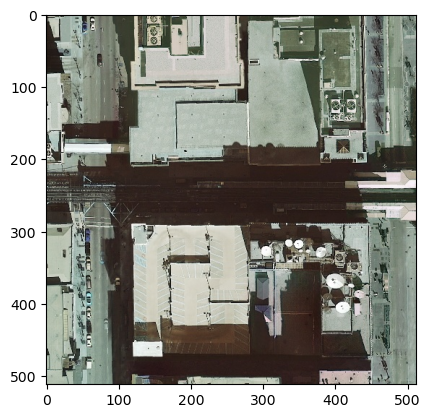

In [40]:
# 图像的读取
import cv2
# 读取第一张图片
img = cv2.imread(df.loc[0,'image_path'])
# openCV默认是BGR，转换成RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img.shape

# 绘制图像
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

# mask 的读取显示

由于 train_mask.csv 中提供的mask是rle编码，需要将rle编码转换为图像（rle是行程长度编码）。编码、解码、显示代码如下：

['135016', '4', '135527', '8', '136039', '12', '136551', '15', '137062', '20', '137574', '23', '138086', '27', '138597', '31', '139109', '34', '139621', '38', '140133', '41', '140644', '46', '141156', '49', '141668', '51', '142179', '51', '142691', '51', '143203', '51', '143715', '51', '144226', '51', '144738', '51', '145250', '51', '145761', '51', '146273', '51', '146785', '51', '147297', '51', '147808', '51', '148320', '51', '148832', '51', '149343', '51', '149855', '51', '150367', '51', '150879', '51', '151390', '51', '151902', '51', '152414', '51', '152925', '51', '153437', '51', '153949', '51', '154461', '51', '154972', '51', '155484', '51', '155996', '51', '156507', '51', '157021', '49', '157536', '46', '158052', '42', '158567', '38', '159083', '34', '159598', '31', '160111', '29', '160623', '29', '161134', '30', '161646', '29', '162158', '29', '162669', '30', '163181', '30', '163693', '27', '164205', '27', '164716', '28', '165228', '27', '165740', '27', '166251', '28', '166763',

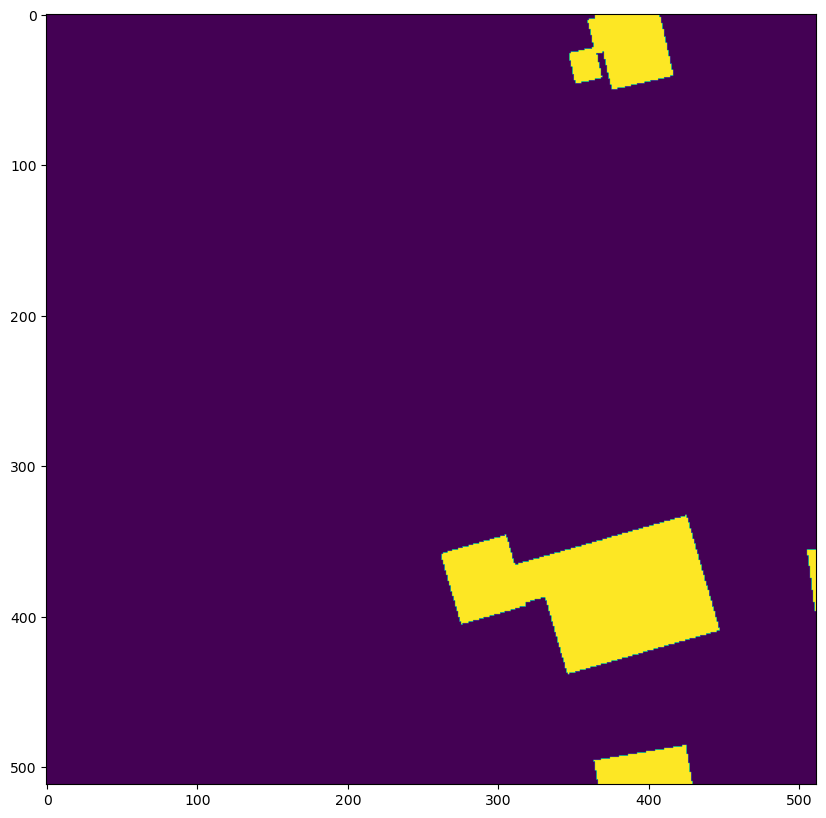

In [41]:
# mask的读取
import numpy as np



# 3.调用rle_decode()函数可以得到mask的图像，代码如下：
mask = rle_decode(df['mask'].iloc[1])
mask2 = np.array(mask) # 将mask转换为矩阵，mask为单通道
masks = np.stack((mask2,mask2,mask2), axis=2).astype('float32') # 将mask叠加为三通道，[h, w, c]

# 4.mask的显示代码如下：
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()